# Latent Feature Models

Latent feature values for $N$ objects:

$$\mathbf{F} = [\mathbf{f}_1^T \mathbf{f}_2^T\dots \mathbf{f}_N^T]^T$$

$$\mathbf{F} = \mathbf{Z} \odot \mathbf{V}$$

where:

- $\mathbf{Z}$ is binary matrix indicating which features are possessed by an object
- $\mathbf{V}$ indicates the value of each feature for each project
- $\odot$ indicates element-wise (Hadamard) product

Can specify prior on $\mathbf{Z}$ and $\mathbf{V}$ separately:

$$P(\mathbf{F}) = P(\mathbf{Z})P(\mathbf{V})$$

## Finite Feature Model

- $K$ features
- $P(z_{i,k} \mid \mathbf{\pi}) = \pi_k$
- $P(\mathbf{Z} \mid \mathbf{\pi})$ is:

$$P(\mathbf{Z} \mid \mathbf{\pi})
= \prod_{i=1}^N \prod_{k=1}^K P(z_{i,k} \mid \pi_k)
$$
Defining $m_k =\sum_{i=1}^N z_{i,k}$ as the number of objects having feature $k$:
$$P(\mathbf{Z} \mid \mathbf{\pi})
= \prod_{k=1}^K \pi_k^{m_k} (1-\pi_k)^{N-m_k}
$$

Take $\pi_k$ to follow Beta distribution, the conjugate prior of Binomial distribution then:

$$p(\pi_k) = \frac{\pi_k^{r-1}(1-\pi_k)^{s-1}}{B(r,s)}$$

where $B(r,s)$ is Beta function:

$$B(r,s)=\int_0^1 \pi_k^{r-1}(1 - \pi_k)^{s - 1}\,d\pi_k$$
$$=\frac{\Gamma(r)\Gamma(s)}{\Gamma(r+s)}$$

Take $r = \alpha/K$, and $s=1$, then:

$$B(\alpha/K, 1) = \frac{\Gamma(\alpha/K)}{\Gamma(1 + \alpha/K)}$$
$$=\frac{\Gamma(\alpha/K)}{(\alpha/K)\Gamma(\alpha/K)}$$
$$=\frac{K}{\alpha}$$

Model is:

$$\pi_k \mid \alpha \sim \mathrm{Beta}(\alpha/K,1)$$
$$z_{i,k} \mid \pi_k \sim \mathrm{Bernoulli}(\pi_k)$$



Integrating over $\pi_k$, and this follows closely how it worked for finite mixture models, so we can more or less work through using the same mechanisms:

$$
P(\mathbf{Z} \mid \alpha) =
\prod_{k=1}^K
\int
p(\pi_k \mid \alpha)
\prod_{i=1}^N
p(z_{i,k} \mid \pi_k)
\, d\pi_k
$$

$$
=
\prod_{k=1}^K
\int
\frac{\alpha}{K}
\pi_k^{\alpha/K - 1}(1-\pi_k)^{N-m_k}
\prod_{i=1}^N
\pi_k^{z_{i,k}}
\, d\pi_k
$$

$$
=
\left(\frac{\alpha}{K}\right)^K
\prod_{k=1}^K
\int
\pi_k^{\alpha/K - 1}
\pi_k^{m_k}
(1 - \pi_k)^{N-m_k}
\, d\pi_k
$$

$$
=
\left(\frac{\alpha}{K}\right)^K
\prod_{k=1}^K
\int
\pi_k^{m_k + \alpha/K - 1}
(1 - \pi_k)^{N-m_k}
\, d\pi_k
$$



$$
=
\left(\frac{\alpha}{K}\right)^K
\prod_{k=1}^K
B(m_k + \alpha, N-m_k+1)
$$

$$
=
\left(\frac{\alpha}{K}\right)^K
\prod_{k=1}^K
\frac
  {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N + \alpha/K + 1)}
$$

... in agreement with the tutorial

## Expectation of number non-zero entries

Griffiths and Ghahramani state that the expectation of number of non-zeros has an upper bound that is independent of $K$, which they then proceed to calculate.  I initially wondered how it could be true that the number of non-zeros entries doesnt increase with $K$.  Since there is no limit on the number of features that can be assigned to each object, surely adding more $K$ features will increase the number of features?  But its because the shape parameter of the Beta distribution is parameterized inversely in terms of $K$, ie $\alpha/K$, so as $K \to \infty$, the Beta shape parameter $\to 0$.

Let's try to calculate $\mathbb{E}[\mathbf{1}^T\mathbf{Z}\mathbf{1}]$, without looking at the Griffiths and Ghahramani tutorial first.  Actually, I already glanced through it, and they calculate first the expectation for one feature, $\mathbb{E}[\mathbf{1}^T\mathbf{z}_k]$. so let's try that.

$$
\mathbb{E}[\mathbf{1}^T\mathbf{z}_k] =
N \mathbb{E}[z_{n,k}]
$$

$$
=
  N
  \int
  p(z_{n,k} = 1 \mid \pi_k, \alpha)
  p(\pi_k \mid \alpha)
  \, d\pi_k
$$

$$
=
  N
  \int
  \pi_k
  \frac{\pi_k^{r-1}(1-\pi_k)^{s-1}}{B(r,s)}
  \, d\pi_k
$$

Substitute $r = \alpha/K$, $s = 1$:

$$
=
  N
  \int
  \pi_k
  \frac{\pi_k^{\alpha/K-1}(1-\pi_k)^{1-1}}
  {K/\alpha}
  \, d\pi_k
$$

$$
=
  N
  \int
  \frac{\alpha \pi_k^{\alpha/K + 1 - 1}}
  {K}
  \, d\pi_k
$$

$$
=
  \frac
    {N\alpha}
    {K}
  \int
  \pi_k^{\alpha/K + 1 - 1}
  \, d\pi_k
$$

$$
= \frac
    {N\alpha}
    {K}
  B(\alpha/K + 1, 1)
$$

$$
= \frac
    {N\alpha}
    {K}
  \frac
    {\Gamma(\alpha/K + 1) \Gamma(1)}
    {\Gamma(\alpha/K + 2)}
$$

$$
= \frac
    {N\alpha}
    {K}
  \frac
    {\Gamma(\alpha/K + 1)}
    {\Gamma(\alpha/K + 2)}
$$

$$
= \frac
    {N\alpha}
    {K}
  \frac
    {\Gamma(\alpha/K + 1)}
    {(\alpha/K + 1)\Gamma(\alpha/K + 1)}
$$

$$
= \frac
    {N\alpha}
    {K}
  \frac
    {1}
    {(\alpha/K + 1)}
$$

Then multiply by $K$ to get $\mathbb{E}(\mathbf{1}^T \mathbf{Z} \mathbf{1})$:
$$
= N\alpha
  \frac
    {1}
    {\alpha/K + 1}
$$

And then, glancing at the Griffiths and Ghahramani tutorial, and after correcting any obvious errors above as necessary, we get:
$$
= \frac
    {N\alpha}
    {1 + \alpha/K}
$$

... as required.

Then, as stated, as $K \to \infty$, $\mathbb{E}(\mathbf{1}^T \mathbf{Z} \mathbf{1}) \to N\alpha$.
  
As stated, this is independent of $K$.

Lets try slotting in some concrete numbers...

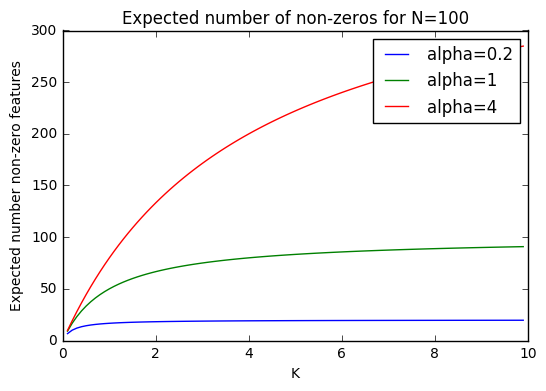

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math


def plot_nonzeros(alpha, N=100):
    K_values = np.arange(0.1, 10, 0.1)
    nonzero_values = N * alpha / ( 1 + alpha / K_values)
    plt.plot(K_values, nonzero_values, label='alpha=%s' % alpha)

plt.clf()
plot_nonzeros(alpha=0.2)
plot_nonzeros(alpha=1)
plot_nonzeros(alpha=4)
plt.xlabel('K')
plt.ylabel('Expected number non-zero features')
plt.legend()
plt.title('Expected number of non-zeros for N=100')
plt.show()


For all values of $\alpha$, the expected number of non-zeros increases with $K$, reaching an effective plateau at some point.  For smaller values of $\alpha$, the plateau is reached sooner, and is numerically smaller, than for larger values of $\alpha$.

## Equivalence classes

This section assumes one has already read the section in the Griffiths and Ghahramani tutorial on equivalence classes.

Thinking from the start, the equivalence classes will be used in the presence of some data that we will use to calculate the posterior of our prior from.  So, the data will:

- have points in a certain order.  we cant just swap pairs of data points (cf generation, where there is no particular order in which we need to generate new data)
- have points that are probably associated with features, which we could label, eg 'dahl', 'naan'
- however the index numbers of the features can be freely swapped around

So, for example the following two matrixes would be equivalent under these constraints:

```
Feature  1 (dahl)   2           3 (naan)   
Tom      1          0           1          0  ... 0 ...
Jane     0          0           1          0  ... 0 ...
```

```
Feature  345 (naan) 100 (dahl)  222        
Tom      1          1           0          0  ... 0 ...
Jane     1          0           0          0  ... 0 ...
```
...since both matrices show each person eating the same food as in the other matrix, just the feature ids have been swapped around.

If we assumed that each feature column was unique, like:

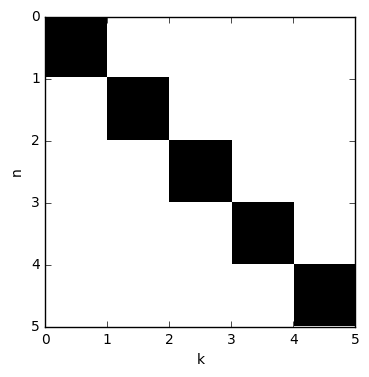

In [50]:
import matplotlib.pyplot as plt
import numpy as np


N = 5
K = 5

grid = np.zeros((N, K, 3), dtype=np.float32)
grid.fill(1.0)
for n in range(N):
    grid[n][n][:] = 0.0

plt.imshow(grid, interpolation='nearest', extent=[0, K, N, 0])
plt.xlabel('k')
plt.ylabel('n')
plt.show()

Or, using just 3 features, and writing out as binary, like eg:

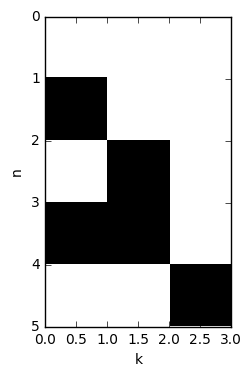

In [59]:
import matplotlib.pyplot as plt
import numpy as np


N = 5
K = 3

grid = np.zeros((N, K, 3), dtype=np.float32)
grid.fill(1.0)
for n in range(N):
    n_bin_str = np.binary_repr(n, width=K)
    for k, v in enumerate(n_bin_str):
        if v == '1':
            grid[n][K - 1 - k][:] = 0.0

plt.imshow(grid, interpolation='nearest', extent=[0, K, N, 0])
plt.xlabel('k')
plt.ylabel('n')
plt.show()

... then if we know how many columns have non-zero values, ie how many features have non-zero values, then the number of ways of arranging these columns, by reordering the index numbers, would be:

$$\mathrm{cardinality\,of\,} \left[ \mathbf{Z} \right]=\, ^{K}P_{\mathrm{number\, non-zero \,features}}$$

If we define 'number features with non-zero values' to be $K^+$, then we can write:

$$\mathrm{cardinality\,of\,} \left[ \mathbf{Z} \right]=\, \frac{K!}{(K - K^+)!}$$

In a sense this is kicking the can down the line, since we don't have a formulae for $K^+$.  But if we imagine a scenario where we are using Gibbs sampling, it seems plausible to imagine that we can easily calculate $K^+$, whereas we wouldnt want to actually count $\frac{K!}{K^+!}$ by hand?

However, in the above, we assume that each of the columns of the matrix is unique.  So we might have a matrix like:

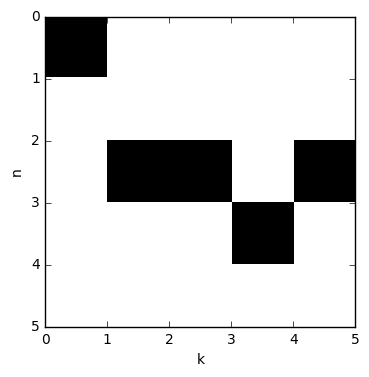

In [61]:
import matplotlib.pyplot as plt
import numpy as np


N = 5
K = 5

grid = np.zeros((N, K, 3), dtype=np.float32)

def grid_plot(grid, x, y):
    grid[y][x][:] = 0.0

grid.fill(1.0)
grid_plot(grid, 0, 0)
grid_plot(grid, 1, 2)
grid_plot(grid, 2, 2)
grid_plot(grid, 3, 3)
grid_plot(grid, 4, 2)

plt.imshow(grid, interpolation='nearest', extent=[0, K, N, 0])
plt.xlabel('k')
plt.ylabel('n')
plt.show()

In this case, the number of ways of arranging the matrix columns, as calculated by $^KP_{K^+}$, is an over-estimation, because permutating columns 1, 2, and 4 does not create a new matrix.  So, we should compensate, in this case, by dividing by $3!$, ie the number of columns that are identical to each other.

More generally, for any pattern of 1s and 0s in a feature column, we need to count the total number of columns with the exact same pattern, $K_h$, and divide the number of equivalent classes so far by $K_h!$.

In the tutorial, an identifier is defined and created for each pattern of 1s and 0s in a feature column, which is termed the "full history".  The full history is defined to be the integer created by concatenating the 1s and 0s in a feature column into a binary number.  I think the definition is somewhat arbitrary, as long as it uniquely identifies the patterns of 1s and 0s in a feature column, and can be used to concisely and repeatably label such a pattern.

Then, if we know the number of columns of each pattern, $K_h$, for different values of $h$, then the number of equivalence pairs will be:

$$
\mathrm{cardinality\,of\,} \left[ \mathbf{Z} \right]=\,
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
$$

In this notation, we can see a key advantage of using the binary representation is that we can concisely represent all possible feature layouts, by iterating over all binary numbers, from $0$, up to $2^N - 1$.

Thinking about how we'd use this, presumably, in a Gibbs sampling scenario, we could relatively easily obtain the values of $K_h$.  We might not iterate over all the values of $h$ as such: we might just store the counts in a hash table perhaps?  For example, if we had only 1000 data samples, a tiny dataset, then $2^N$ is about $1e300$, which is far beyond the limits of current computers.

Thinking about this, as a hash table, we'd only need to store the actual concrete feature column identifiers we've actually seen.  This is upper-bounded by the total number of non-zero values.  The expectation for the total number of non-zero values was calculated in the previous section, and is $N\alpha$.  So, with $\alpha$ of say 10, and 1000 data points, we'd need at most 10,000 keys to store the feature column identifiers in a hashmap, which is very doable.  For one million data points, and $\alpha = 10$, we'd need at most 10 million keys in the hashmap, and if each key is an integer, that's about 40megabytes, ball-park, for the keys, and same again for the values, so total 80megabytes, and very doable.

## Taking the infinite limit

We have:

$$
P(\mathbf{Z} \mid \alpha) =
\left(\frac{\alpha}{K}\right)^K
\prod_{k=1}^K
\frac
  {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1)}
  {\Gamma(N + \alpha/K + 1)}
$$

and:

$$
\mathrm{cardinality\,of\,} \left[ \mathbf{Z} \right]=\,
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
$$

So:

$$
P([\mathbf{Z}] \mid \alpha) =
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
\left(\frac{\alpha}{K}\right)^K
\prod_{k=1}^K
\frac
  {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1)}
  {\Gamma(N + \alpha/K + 1)}
$$

We want to find the limit as $K \to \infty$.  Per the tutorial, we should divide the columns of $\mathbf{Z}$ into two sets: those with $m_k = 0$, and those with $m_k > 0$.  We will reorder the features so that $m_k >0 $ iff $k \le K^+$, and $m_k = 0$ otherwise.

So we get:

$$
P([\mathbf{Z}] \mid \alpha) =
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
\left(\frac{\alpha}{K}\right)^K
\prod_{k=K^+ + 1}^K
\left(
\frac
  {\Gamma(\alpha/K)\Gamma(N+1}
  {\Gamma(N + \alpha/K + 1)}
  \right)
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N + \alpha/K + 1)}
  \right)
$$

$$
 =
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
\left(\frac{\alpha}{K}\right)^K
\left(
  \frac
  {\Gamma(\alpha/K)\Gamma(N+1}
  {\Gamma(N + \alpha/K + 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
  \left(
    \frac
    {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1}
    {\Gamma(N + \alpha/K + 1)}
  \right)
$$



Looking at the limit as $K \to \infty$, any terms like $a + b/K$, where $a$ and $b$ are finite, will tend to $a$.  We need to pay attention to any terms that are just in $aK$, or $a/K$ which will tend to $0$ or $\infty$, respectively.  Gotcha, that got me: $\Gamma(0)$ is not $1$: it's $+\infty$:

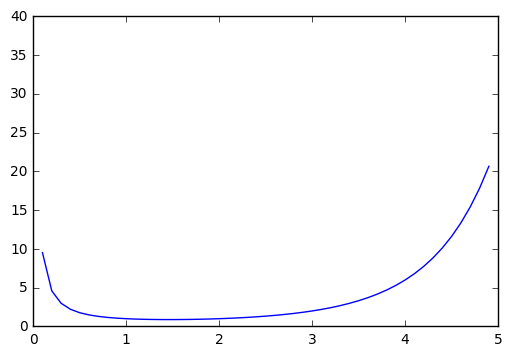

In [9]:
from scipy.special import gamma
import matplotlib.pyplot as plt
import numpy as np


def plot_gamma():
    X = np.arange(0, 5, 0.1)
    y = gamma(X)
    plt.plot(X, y)
    plt.ylim(0, 40)
    plt.show()
plot_gamma()

... so we should expand the term in $\Gamma(\alpha/K)$, on the right hand side, from $\Gamma(\alpha/K)$ to $\frac{\Gamma(\alpha/K + 1)}{\alpha/K}$.  This is valid because we're reversing the normal direction, ie $\Gamma(x) = (x-1)\Gamma(x-1)$, for $x > 1$, and here our $x$ is $\alpha/K + 1$.

$$
\to_{K \to \infty}
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
\left(\frac{\alpha}{K}\right)^K
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {(\alpha/K)\Gamma(N + \alpha/K + 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N + \alpha/K + 1)}
  \right)
$$

$$
=
\frac
  {K!}
  {\prod_{h=0}^{2^N-1}K_h!}
\left(\frac{\alpha}{K}\right)^K
\left(
\frac{K}
  {\alpha}
\right)^{K_0}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k + \alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N + \alpha/K + 1)}
  \right)
$$

Gotcha number two, that got me: whilst a single term in $a + b/K$ will tend to $a$ as $K \to \infty$, the same term raised to a power of $K$, will not necessarily do so, and such terms must be handled as a whole.

We can combine the fractions in $\alpha/K$:

$$
\left(\frac{\alpha}{K} \right)^K \left( \frac{K}{\alpha} \right)^{K_0}
  = \left(\frac{\alpha}{K} \right)^{K^+}
$$

Giving:

$$
\to_{K \to \infty}
\alpha^{K^+}
\frac
  {K!}
  {K^{K^+}\prod_{h=0}^{2^N-1}K_h!}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N+\alpha/K + 1)}
  \right)
 $$

Looking at the term:

$$\prod_{h=0}^{2^N-1}K_h!$$

$K_h \le K^+$ for $h>0$.  However, $K_0$ is not finite, so we should split that out separately:

$$
\to_{K \to \infty}
\alpha^{K^+}
\frac
  {K!}
  {K^{K^+}K_0!\prod_{h=1}^{2^N-1}K_h!}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N+\alpha/K + 1)}
  \right)
$$

And we have:

$$\frac{K!}{K_0!K^{K^+}} \to 1$$

(from earlier).  So:

$$
\to_{K \to \infty}
\frac
  {\alpha^{K^+}}
  {\prod_{h=1}^{2^N-1}K_h!}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N +\alpha/K+ 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N+\alpha/K + 1)}
  \right)
$$


At this point, I kind of got stuck, so started to work backwards, from the result in the tutorial.

#### Infinite limit of middle term

I first looked at the middle term, the one raised to the power $K_0$.  Initially, I assumed this was assymptotic to $1$, from looking at the terms inside, which tend themselves to $1$.  However, after inspecting the answer in the tutorial, it looks like we need to handle the terms inside the brackets together with the infinite power of $K_0$.

The tutorial asserts that:

$$
\left(
  \frac{N!}
    {\prod_{j=1}^N(j + \alpha/K)}
\right)^K
\to
  \exp \left(-\alpha\sum_{j=1}^N 1/j \right)
$$

I started by trying to figure out this bit.  Is it using Stirling's approximation? Taylor series? Something else?

Taylor series includes things like:

$$
\exp(x) = \sum_{j=1}^{\infty} \frac{x^j}{j!}
$$

Stirling's approximation looks something like:

$$
n! \to \sqrt{2\pi n}\left( \frac{n}{e} \right)^n
$$

I tried inverting the equivalence in the tutorial, to see if it looked more familiar:

$$
\left(
  \frac
    {\prod_{j=1}^N(j + \alpha/K)}
    {N!}
\right)^K
\to
  \exp \left(\alpha\sum_{j=1}^N 1/j \right)
$$

It sort of has characteristics of both Taylor series for $\exp(x)$ and Stirling's approximation, but not clear match with either :-P

- there's a $\pi$ term in the Stirling's approximation, which isnt present in the tutorial equivalence. And seems no obvious reason why the $\pi$ would disappear
- the Taylor series involves a sum over infinite terms, whereas the tutorial expression has a product, over a finite number of terms



I tried taking logs, of the tutorial limit expression, to get rid of the power to K, and the $\exp(x)$  This didnt really work for me:

$$
K\log \left( \prod_{j=1}^N ( j + \alpha/K ) \right)
- K\log(N!)
\to
\alpha\sum_{j=1}^N \frac{1}{j}
$$

So:
$$
K\sum_{j=1}^N \log(j + \alpha/K)
- K\log(N!)
\to
\alpha\sum_{j=1}^N \frac{1}{j}
$$

Writing the log of the factorial also as a sum of logs:

$$
K\sum_{j=1}^N \log(j + \alpha/K)
- K\sum_{j=1}^N(\log(j))
\to
\alpha\sum_{j=1}^N \frac{1}{j}
$$

Looking at just the left hand side for now:

$$
K\sum_{j=1}^N \log(j + \alpha/K)
- K\sum_{j=1}^N(\log(j))
$$
$$
=
K\sum_{j=1}^N (\log(j+\alpha/K) - \log(j))
$$

$$
=
K\sum_{j=1}^N \log \left( 1 + \frac{\alpha}{jK} \right)
$$


At this point, I gave up, and looked at the appendix :-)  The identity that we want is:

$$
\exp(x) = \lim_{n \to \infty} \left(1 + \frac{x}{n} \right)^n
$$

which in our case becomes, by inverting both sides:

$$
\lim_{K \to \infty}
\left(
\frac{1}
  {1 + x\,/\,K}
\right)^K
= \frac{1}{\exp(x)}
$$

So, looking at:

$$
\left(
  \frac{N!}
    {\prod_{j=1}^N(j + \alpha/K)}
\right)^K
$$

This is:

$$
\left(
  \frac{\prod_{j=1}^Nj}
    {\prod_{j=1}^N(j + \alpha/K)}
\right)^K
$$
$$
=
\left(
\prod_{j=1}^N
  \frac{j}
    {(j + \alpha/K)}
\right)^K
$$
$$
=
\left(
\prod_{j=1}^N
  \frac{1}
    {1 + \frac{\alpha}{jK}}
\right)^K
$$


How to move the product to outside the power?

From basics:
$$
(xyz)^a
$$
$$
=x^ay^az^a
$$
So, $$
\left( \prod_{i=1}^N x_i \right)^a
$$
$$
= \prod_{i=1}^N x_i^a
$$

And, in our case:
$$
\left(
\prod_{j=1}^N
  \frac{1}
    {1 + \frac{\alpha}{jK}}
\right)^K
$$
$$
=
\prod_{j=1}^N
\left(
  \frac{1}
    {1 + \frac{\alpha}{jK}}
\right)^K
$$

Using the identity from earlier:
$$
\lim_{K \to \infty} 
\prod_{j=1}^N
\left(
  \frac{1}
    {1 + \frac{\alpha}{jK}}
\right)^K
$$

$$
=\prod_{j=1}^N
\left(
\frac{1}
  {\exp(\alpha/j)}
\right)
$$

$$
=\prod_{j=1}^N \exp \left(-\frac{\alpha}{j}\right)
$$

$$
= \exp \left(-\sum_{j=1}^N \frac{\alpha}{j}\right)
$$

$$
= \exp \left(-\alpha \sum_{j=1}^N \frac{1}{j}\right)
$$

... as required.

#### Initial pre-limit expression

Next up, we need to get from the earlier expression for the infinite limit, as far as obtaining the $(N!/(\prod_{j=1}^N(j + \alpha/K))^K$ expression. The expression so far was:

$$
\frac
  {\alpha^{K^+}}
  {\prod_{h=1}^{2^N-1}K_h!}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K_0}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N+\alpha/K + 1)}
  \right)
$$

We need to change the current middle expression to be a power of $K$ rather than $K_0$ (by inspection of the tutorial, and because we'll need it for the identity in $\exp$):

$$
=\frac
  {\alpha^{K^+}}
  {\prod_{h=1}^{2^N-1}K_h!}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K}
\left(
\frac
  {\Gamma(N+\alpha/K + 1)}
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  \right)^{K+}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(N+\alpha/K + 1)}
  \right)
$$

Merging with the right-hand expression:

$$
=\frac
  {\alpha^{K^+}}
  {\prod_{h=1}^{2^N-1}K_h!}
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K}
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  \right)
$$

#### Right-hand pre-limit expression

Looking at the right-hand expression:

$$
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)\Gamma(N-m_k+1}
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  \right)
$$

Since $N$ and $m_k$ are integers, we have:
$$
=
\prod_{k=1}^{K^+}
\left(
\frac
  {\Gamma(m_k+\alpha/K)(N-m_k)!}
  {\Gamma(\alpha/K+1) N!}
  \right)
$$

For the Gamma terms containing $\alpha/K$, we can move the integer part, $m_k$, in the numerator, into a product term, leaving a $\Gamma(\alpha/K + 1)$ term, which will cancel with the denominator.  First expansion will be:

$$
\Gamma(m_k + \alpha/K)
$$
$$
=\Gamma((m_k - 1) + 1 + \alpha/K)
$$
$$
= ((m_k - 2) + \alpha/K +1)\Gamma( (m_k - 2) + \alpha/K + 1)
$$

Last expansion will be:
$$
(m_k - m_k + \alpha/K + 1)
\dots
\Gamma(\alpha/K + 1)
$$

So, the full expansion will be:
$$
\Gamma(m_k + \alpha/K)
= \Gamma(\alpha/K + 1)
  \prod_{j=1}^{m_k - 1} (j + \alpha/K) 
$$

Slotting this into the right-hand expression, and cancelling the $\Gamma(1 + \alpha/K)$ terms:

$$
=
\prod_{k=1}^{K^+}
\left(
\frac
  {(N-m_k)!\, \prod_{j=1}^{m_k - 1} (j + \alpha/K)}
  {N!}
  \right)
$$

... which matches the right-hand expression in the tutorial, prior to computing the limit.

#### Middle pre-limit expression

Looking now at the middle expression, we have:

$$
\left(
\frac
  {\Gamma(\alpha/K+1) \Gamma(N+1)}
  {\Gamma(N+\alpha/K + 1)}
  \right)^{K}
$$

We want, from the tutorial:

$$
\left(
  \frac
    {N!}
    {\prod_{j=1}^N(j + \frac{\alpha}{K}}
\right)^K
$$

Let's try the same approach as for the right-hand expression: expand the $\Gamma(N + \alpha/K + 1)$, in the denominator, to give a polynomial multiplied by $\Gamma(\alpha/K + 1)$, which will cancel with the Gamma in the numerator.

Looking at $\Gamma(N + \alpha/K + 1)$, the first expansion will be:

$$
((N - 1) + \alpha/K + 1)\Gamma((N - 1) + \alpha/K + 1)
$$
The last expansion will be:
$$
((N - N) + \alpha/K + 1)\dots \Gamma((N - N) + \alpha/K + 1)
$$
So, overall the expansion will be:
$$
\Gamma(\alpha/K + 1)\prod_{j=1}^{N}(j + \alpha/K)
$$

Slotting this into the middle expression, and cancelling the terms in $\Gamma(\alpha/K + 1)$, we get:

$$
\left(
\frac
  {\Gamma(N+1)}
  {\prod_{j=1}^{N}(j + \alpha/K)}
  \right)^{K}
$$

Then, since $N$ is an integer, writing $\Gamma(N+1)$ as $N!$, we get:

$$
\left(
\frac
  {N!}
  {\prod_{j=1}^{N}(j + \alpha/K)}
  \right)^{K}
$$

... which matches the middle pre-limit term in the tutorial.

#### Taking the infinite limit

We have the pre-limit expression:

$$
=\frac
  {\alpha^{K^+}}
  {\prod_{h=1}^{2^N-1}K_h!}
\cdot
\frac{K!}{K_0!K^{K^+}}
\cdot
\left(
\frac
  {N!}
  {\prod_{j=1}^{N}(j + \alpha/K)}
  \right)^{K}
\cdot
\prod_{k=1}^{K^+}
\left(
\frac
  {(N-m_k)!\, \prod_{j=1}^{m_k - 1} (j + \alpha/K)}
  {N!}
  \right)
$$

We've already seen that:

$$
\lim_{K \to \infty}
\frac{K!}{K_0!K^{K^+}}
= 1
$$
(from the section on latent classes earlier)

We've also seen that:

$$
\lim_{K \to \infty}
\left(
\frac
  {N!}
  {\prod_{j=1}^{N}(j + \alpha/K)}
  \right)^{K}
= \exp \left(
    -\alpha\sum_{j=1}^N \frac{1}{j}
  \right)
$$

So, we're left with taking the limit of:

$$
\lim_{K \to \infty}
\prod_{k=1}^{K^+}
\left(
\frac
  {(N-m_k)!\, \prod_{j=1}^{m_k - 1} (j + \alpha/K)}
  {N!}
  \right)
$$

My earlier intuition would be to just remove the expression in $\alpha/K$, giving:

$$
\prod_{k=1}^{K^+}
\left(
\frac
  {(N-m_k)!\, (m_k - 1!}
  {N!}
  \right)
$$
...which does match the tutorial, but I sort of no longer trust my intuition on this point, and looked at the appendix.

The appendix multiplies out the innermost product, the product over $j$, ~~using the Binomial theorem~~ by hand I think?, giving:

$$
\prod_{j=1}^{m_k-1}
\left(j + \frac{\alpha}{K}
\right)
$$
$$
=
(m_k-1)!
+
\sum_{j=1}^{m_k-1}
\frac{\alpha}{K}
\frac{(m_k-1)!}
  {j}
+ \left(\frac{\alpha}{K}\right)^2\left(\dots\right)
\dots
+ \left(\frac{\alpha}{K}\right)^{m_k-1}\left(\dots\right)
$$

Since $m_k$ is finite, and therefore also $j$ too, then each term goes to zero, because of $\frac{1}{K}$, except for the first $(m_k-1)!$ term.

So, finally, we have the expression for the infinite limit of $P([\mathbf{Z}])$:

$$
\frac
  {\alpha^{K^+}}
  {\prod_{h=1}^{2^N-1}K_h!}
\cdot
\exp \left(-\alpha\sum_{j=1}^N \frac{1}{j} \right)
\cdot
\prod_{k=1}^{K^+}
\frac{(N-m_k)!(m_k-1)!}
  {N!}
$$


## Indian Buffet process

Per tutorial, we can sample from IBP by choosing each existing dish with probability $m_k / i$ where $i$ is the customer number, and $m_k$ is the number of customers for that dish so far, then sampling Poisson$(\alpha/i)$ new dishes.  Interestingly, the probability of choosing each existing dish is independent of $\alpha$.

Let's first look at the Poisson distribution.  It represents the probability of a given number of events occurring in unit interval.  $\lambda$ is the average number of events per unit interval.  The probability function is discrete, having probability mass only for integer values.

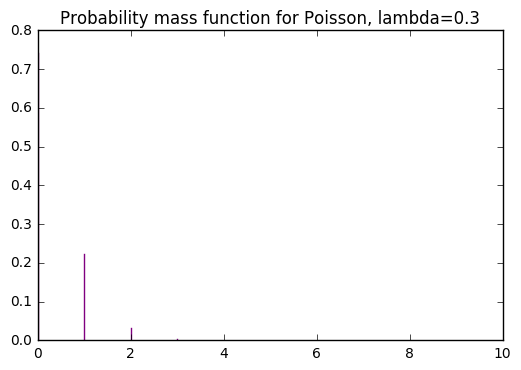

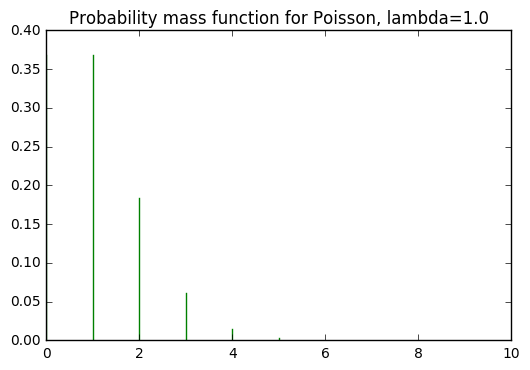

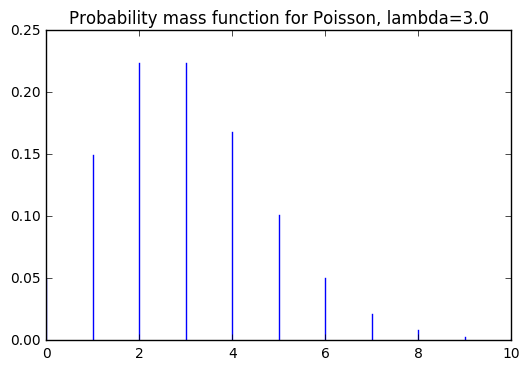

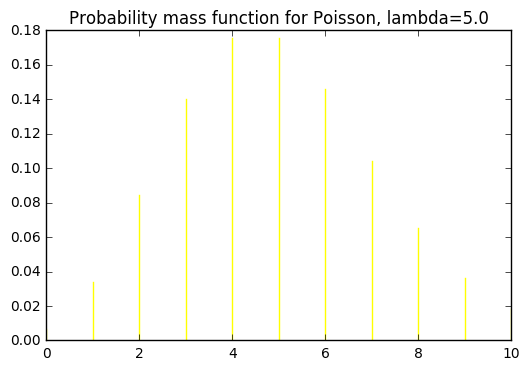

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def draw_poisson(lambda_value, color_letter):
    plt.clf()
    for k in range(10 + 1):
        prob_mass = np.power(lambda_value, k) * np.exp(-lambda_value) / math.factorial(k)
        plt.plot([k, k], [0, prob_mass], color_letter)
    plt.title('Probability mass function for Poisson, lambda=%s' % lambda_value)
    plt.show()

draw_poisson(0.3, 'purple')
draw_poisson(1.0, 'g')
draw_poisson(3.0, 'b')
draw_poisson(5.0, 'yellow')

Let's try sampling from an Indian Buffet Process:

K_plus 11


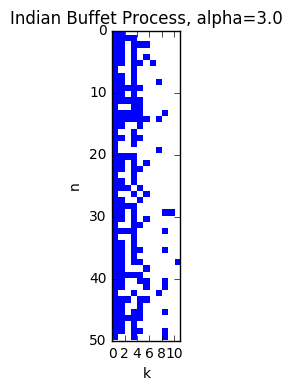

K_plus 3


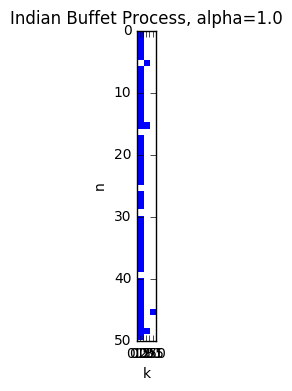

K_plus 1


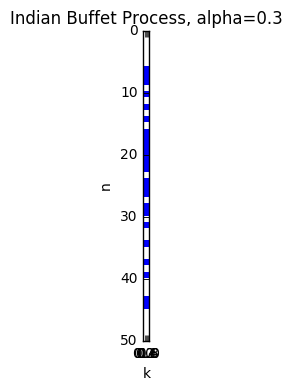

K_plus 44


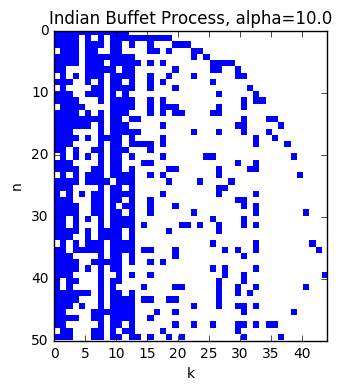

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from collections import defaultdict


def plot_ibp(alpha=3.0, N=50):
    K_plus = 0
    count_by_k = defaultdict(int)
    chosen_by_customer = defaultdict(set)

    random.seed(123)
    np.random.seed(123)
    for n in range(N):
        # first sample existing dishes:
        for k in range(K_plus):
            prob = count_by_k[k] / (n + 1)
            if random.uniform(0, 1) <= prob:
                chosen_by_customer[n].add(k)
                count_by_k[k] += 1
        # now try some new ones
        num_new = np.random.poisson(lam=alpha / (n + 1))
        for i in range(num_new):
            k = K_plus
            chosen_by_customer[n].add(k)
            count_by_k[k] += 1
            K_plus += 1

    print('K_plus', K_plus)    
    grid = np.zeros((N, K_plus, 3), dtype=np.float32)
    grid.fill(1.0)
    for n, chosen in chosen_by_customer.items():
        for k in chosen:
            grid[n][k][0:2] = 0.0

    plt.clf()
    plt.imshow(grid, interpolation='nearest', extent=[0, K_plus, N, 0])
    plt.xlabel('k')
    plt.ylabel('n')
    plt.title('Indian Buffet Process, alpha=%s' % alpha)
    plt.show()

plot_ibp(alpha=3.0)
plot_ibp(alpha=1.0)
plot_ibp(alpha=0.3)
plot_ibp(alpha=10.0)

#### Analysis of values of $K^+$, for some values of $\alpha$ and $N$

Looking at the number of features, $K^+$, for different values of $N$ and $\alpha$, empirically, for the ranges sampled, we can see that:

- $K_+$ tends to be less than $N$, at least for $\alpha <= 10$, and $N >= 40$
- it looks like the ratio of $K^+/N$ decreases with increasing $N$, which makes sense, given that the Poisson parameter decreases for each new customer.

Thinking about an actual use-case scenario, for example distribution of purchases amongst users of Amazon, I wonder what value of $\alpha$ would match approximately the number of purchases per customer, and the number of customers?  Lets say there are 50 million customers, and 100,000 products.  Then we have:

- $K_+ = 1e5$
- $N = 5e7$

To save on maths, let's try empirically :-P

Nuance: to make the program run in reasonable time, lets say there are 1 million customers, and 100,000 produdts.  And we'll plot $K^+$ vs $\alpha$.

N 1000000 alpha 1000 K_plus 14296
N 1000000 alpha 2000 K_plus 28906
N 1000000 alpha 3000 K_plus 43305
N 1000000 alpha 4000 K_plus 57735
N 1000000 alpha 5000 K_plus 72091
N 1000000 alpha 6000 K_plus 86674
N 1000000 alpha 7000 K_plus 100901
N 1000000 alpha 8000 K_plus 115377
N 1000000 alpha 9000 K_plus 129694
N 1000000 alpha 10000 K_plus 144163


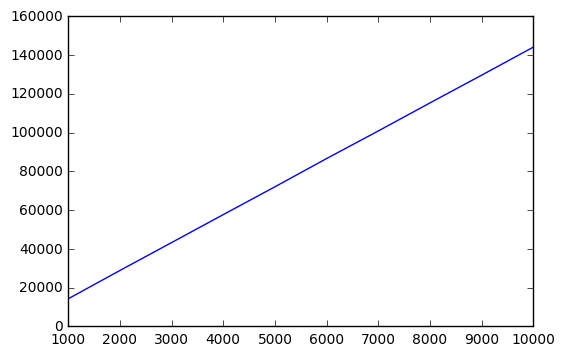

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from collections import defaultdict


def calc_kplus(alpha=3.0, N=50):
    K_plus = 0
    random.seed(123)
    np.random.seed(123)
    # we simply sample from Poisson each time, and add
    # up the resuls
    for n in range(N):
        num_new = np.random.poisson(lam=alpha / (n + 1))
        K_plus += num_new

    print('N', N, 'alpha', alpha, 'K_plus', K_plus) 
    return K_plus

X = range(1000, 10000 + 1000, 1000)
y = np.zeros((len(X), ), dtype=np.int32)
for i, alpha in enumerate(X):
    kplus = calc_kplus(N=int(1e6), alpha=alpha)
    y[i] = kplus
plt.clf()
plt.plot(X, y)
plt.show()

It looks like for $N$ of 1 million, we need $\alpha$ of about 8,000, in order to get $K^+$ of around one hundred thousand.  Interestingly, for these numbers, $K^+$ is approximately linear with $\alpha$.  Which makes sense, since the average number of dishes sampled by each new customer is proportional to $\alpha$.

Actually, the value of $K^+$ should be the sum of a harmonic series, if we assume that the Poisson function simply returns $\alpha/i$ each time.  So, $K^+$ will be:

$$
K^+ \approx \sum_{i=1}^N \frac{\alpha}{i}
$$

This is approximately $\alpha \log(N)$

Let's examine how $\alpha \log(N)$ compares with $\alpha H_N$.  Actually, this formula shows that $K^+$ is directly proportional to $\alpha$, assuming the result of the Poisson gives its expected value each time, which it will on average do.  So, let's just plot for $\alpha=1$.  Let's plot for $N$ up to 10 million, which corresponds approximately to about the order of magnitude of for example Amazon, I guess.

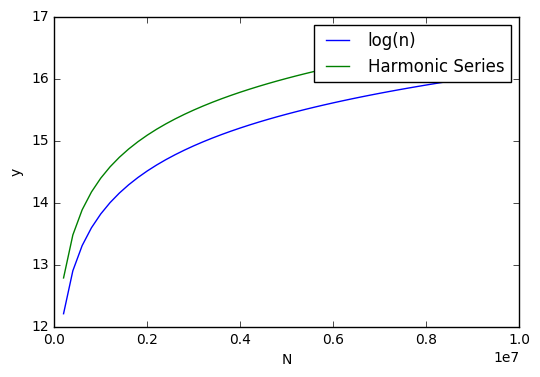

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import math


def compare_logN_HN():
    X = np.arange(2e5, int(1e7), 2e5)
    y_log = np.log(X)
    plt.clf()

    plt.plot(X, y_log, label='log(n)')

    y_hn = np.zeros((len(y_log),), dtype=np.float32)
    HN = 0
    X_values = set(X)
    for n in range(1, int(1e7) + 1):
        HN += 1 / n
        if n in X_values:
            y_hn[n // int(2e5) - 1] = HN
    plt.plot(X, y_hn, label='Harmonic Series')

    plt.xlabel('N')
    plt.ylabel('y')

    plt.legend()
    plt.show()

compare_logN_HN()

We can see that $log(n)$ follows the curve of the harmonic series, $H_N$ quite closely, but is slightly translated from it.  Close enough for ball-park estimation of $K^+$ given $N$ and $\alpha$ though.  So, if we tried to estimate $\alpha$ directly, for the earlier scenario:

For $N=1e6$, $K^+=1e5$, we have:

$$
K^+ \approx \alpha \log(N)
$$

So,
$$
\alpha \approx \frac{K^+}{log(N)}
$$
$$
\approx 7000
$$

Seems pretty close to the $K^+$ estimated by drawing Poisson samples one by one earlier:-)

If we choose $N=5e7$, and $K^+=1e5$, then we get $\alpha \approx 6000$

(Since $N$ is greater, so we need a slightly lower $\alpha$ to get the same $K^+$ value)


More generally, since many datasets will have a size that lies in the range $1e5 <= N <= 1e9$, $\log(N)$ will tend to lie in the range $10 \le \log(N) \le 20$, and so we can approximate $K^+$ to within an order of magnitude as:

$$K^+ \approx 10\alpha$$

(Independent of $N$, for a wide range of realistic values of $N$).  This holds approximately for example in the Amazon guesstimate scenario above.

#### Probability of matrices sampled from IBP

The tutorial states that the probability of a matrix sampled from the IBP, by the process of drawing sequentially, as above, is:

$$
P(\mathbf{Z})_{\mathrm{IBP}} = \frac
  {1}
  {\prod_{h=1}^{N}K_1^{(i))}!}
  P(\mathbf{Z})
$$

where:

- $P(\mathbf{Z})_{\mathrm{IBP}}$ is the probability of drawing a matrix from this process, and
- $P(\mathbf{Z})$ is the probability of drawing a matrix from the Dirichlet prior, from earlier, without taking into account cardinality/partition-equivalance.

Initially, I was interpreting $P(\mathbf{Z})_{IBP}$ to mean the equivalence class cardinality for the draws from the IBP, which confused me, because I couldnt see how $\prod_{h=1}^N K_1^{(i)}!$ gave this.  However, later I realized that in fact $P(\mathbf{Z})_{IBP}$ is the probability of drawing this matrix, taking into account that not all matrices are possible through this drawing scheme.


Getting the probability of the IBP matrix draws took me a while.  I tried a few ways.  Some of which are in the first few paragraphs below.  If you want to skip all the stuff that didnt work, you can just skip down to the paragraph starting "Finally I thought".  Next few paragraphs are my ramblings (some of them...) whilst trying to find a way forward.

Let's think this through a bit.  If we draw a random matrix, without any priors, then there are $2^{N K^+}$ possible arrangements of 1s and 0s, given we know $K^+$.

But in fact when we draw random matrix, with the infinite prior, there is no restriction on $K^+$, and we need to consider the probability of a matrix compared with any possible matrix drawn, including the ones where $K^+$ is really large, albeit with very tiny probability.

Comparing with the earlier equation for the infinite limit of $P(\mathbf{Z})$, it looks like the tutorial is asserting that:

$$
P(\mathbf{Z})_{IBP} =
\frac
 {\prod_{h=1}^{2^N-1}K_h!}
  {\prod_{i=1}^N K_1^{(i)}!}
P([\mathbf{Z}])
$$

Let's denote the original $P(\mathbf{Z})$, the one drawn from binomial features, conditionally independent on $\pi_k$, as $P(\mathbf{Z})_{BF}$.  And the probability of matrices drawn using the Indian Buffer Process, is $P(\mathbf{Z})_{IBP}$.  So, we have:

$$
P(\mathbf{Z})_{IBP} =
\frac
 {\prod_{h=1}^{2^N-1}K_h!}
  {\prod_{i=1}^N K_1^{(i)}!}
P([\mathbf{Z}])_{BF}
$$

From earlier, we have:

$$P([\mathbf{Z}])_{BF} = \frac{K!}{\prod_{h=0}^{2^{N}-1}K_h!} P(\mathbf{Z})_{BF}$$

So, this means that:

$$
P(\mathbf{Z})_{IBP} =
\frac{K!}
 {K_0!\prod_{i=1}^N K_1^{(i)}!}
P(\mathbf{Z})_{BF}
$$

... but I cant quite see how this arises.  Perhaps, the result that the tutorial gives for $P(\mathbf{Z})_{IBP}$ is derived from first principles?  Let's try that.

For the first customer, we draw Poisson$(\alpha)$ features.  Using the $K_1^{(i)}$ notation, the probability of the first draw is, from Poisson distribution:

$$
\frac{\alpha^{K_1^1}\exp(-\alpha)}{K_1^{(1)}!}
$$

For the second customer, we have the probability of drawing 1 and 0 for each of the existing dishes, and then the probability of drawing the next new dishes.  The number of existing dishes is: $K_1^{(1)}$.  And the probability of drawing... well...we need to know which features customer drew draw 1 for, and which ones they drew 0 for.  And looking at the final expression, we only have $K_1^{(i)}$ and $m_k$ to work with.  But we can calculate the draw for each feature using $m_k$.  Using $z_{2,k}$ for the draw of each feature for customer 2 we have:

$$z_{2,k} = m_{\dots} \dots$$

.. .wait, that wont work, because what we'd really need is the partial history of each feature.  But, what about, we simply calculate the probability of the history of each feature, after the time it's been drawn?  For this we just need to know:

- when that feature was first drawn, so we know how long the history is, and
- how many 1s in that history, which is $m_k$

For the features drawn by customer 1, the length of the history, excluding the first 1, is $N - 1$.  And there are exactly $m_k - 1$ 1s in the history after the first customer, and exactly $N - m_k$ 0s.  So the probability of drawing the rest of the history, given the first customer drew a 1, i, binomial distribution.  We need some notation for the feature vector following customer 1, but we can just use the full history vector, conditional on customer 1 drawing a 1.  And let's use $\mathbf{z}_{*,k}$ to denote the full history of feature k.  Then we have:

$$
P(\mathbf{z}_{*,k} \mid z_{1,k} = 1)
= \mathrm{Binomial}(\mathbf{z}_{*,k}; \dots)
$$

... hmmm.... Still wont work, because the probability in the Binomial distribution is not fixed, eg $\alpha$, but changes over time, ie $\frac{m_{k_{i-1}} }{ i }$.

... but it seems like there's not really any other way of figuring out the "probability of any particular matrix being produced by this process", so let's continue.  Let's introduce some new notation: $m_{i,k}$ is the number of times feature $k$ has been chosen by customers up to, and including, customer $i$.  Looking at the probability of the choice of dishes by customer 2, that were already chosen by customer 1, first let's write down the probability of choosing each dish.  It is:

$$
\frac
  {m_{i-1,k}}
  {i}
$$
$$
= \frac
  {m_{1,k}}
  {2}
$$

The probability of the feature vector for customer 2, for $k \le K_1^{(1)}$, is

$$
P(\mathbf{z}_{2,k \le K_1^{(1)}}) =
\prod_{j=1}^{K_1^{(1)}} 
  \left(
    \frac
      {m_{1,k}}
      {2}
   \right)^{z_{2,j}}
  \left(
    1 - 
    \frac
      {m_{1,k}}
      {2}
   \right)^{1 - z_{2,j}}
$$

Or, for all customers, just the probability of each customer sampling existing dishes, not including the Poisson terms yet, the probability is:

$$
P(\mathbf{z}_{*,k \le K_{1}^{(i-1)}}) =
\prod_{i=2}^N
\prod_{p=1}^{i-1}
\prod_{j=1}^{K_1^{p}} 
  \left(
    \frac
      {m_{i-1,j}}
      {i}
   \right)^{z_{i,j}}
  \left(
    1 - 
    \frac
      {m_{i - 1,j}}
      {i}
   \right)^{1 - z_{i,j}}
$$

Note that there is no prior to add for any of the parameters.  In the original formulation, we were sampling from a Bernoulli distribution, parameterized on $\pi_k$, which had a prior with hyperparameter $\alpha$.  But here we are directly sampling based on $\alpha$, and don't need to integerate over $\pi_k$.  So this is the complete formulation for the probability of a matrix.  I think/hope.  Except, we do need to add in the Poisson draw probabilities.  The Poisson draw probability for customer $i$ is:

$$
\mathrm{Poisson}\left(
  K_1^{(i)}; \frac{\alpha}{i}
\right) =
\frac{(\alpha/i)^{K_1^{(i)}}\exp(-\alpha/i)}{K_1^{(i)}!}
$$

So the full probability is:

$$
P(\mathbf{Z})_{\mathrm{IBP}} =
\prod_{i=1}^N 
  \frac{(\alpha/i)^{K_1^{(i)}}\exp(-\alpha/i)}{K_1^{(i)}!}
\cdot
\prod_{i=2}^N
\prod_{p=1}^{i-1}
\prod_{j=1}^{K_1^{p}} 
  \left(
    \frac
      {m_{j-1,j}}
      {i}
   \right)^{z_{i,j}}
  \left(
    1 - 
    \frac
      {m_{j - 1,j}}
      {i}
   \right)^{1 - z_{i,j}}
$$

Looking at the left hand term, ie:

$$
\prod_{i=1}^N 
  \frac{(\alpha/i)^{K_1^{(i)}}\exp(-\alpha/i)}{K_1^{(i)}!}
$$


... we can factorize this out, since it's just products of things, and also bearing in mind that:

$$
\left( \frac{a}{b} \right)^n = \frac{a^n}{b^n}
$$

into:

$$
\prod_{i=1}^N \alpha^{K_1^{(i)}}
\cdot
\prod_{i=1}^N \frac{1}
             {i^{K_1^{(i)}}}
\cdot
\prod_{i=1}^N \exp(-\alpha/i)
\cdot
\prod_{i=1}^N
  \frac{1}
     {K_1^{(i)}!}
$$

Going through each of these terms in turn:

$$
\prod_{i=1}^N \alpha^{K_1^{(i)}}
$$
$$
=\alpha^{\sum_{i=1}^N K_1^{(i)}}
$$
$$
=\alpha^{K^+}
$$

This term figures in the expression in the tutorial, so this seem like a good start.  Let's look at the next term:

$$
\prod_{i=1}^N \frac{1}
             {i^{K_1^{(i)}}}
$$

Not sure, but the fourth term can be combined with the first term to give:

$$
\frac{\alpha^{K^+}}
  {\prod_{i=1}^N K_1^{(i)}!}
$$

... which is the first term in the tutorial expression.

The third term, ie:

$$
\prod_{i=1}^N \exp(-\alpha/i)
$$

Can be written as:
$$
\exp(-\sum_{i=1}^N \alpha/i)
$$
$$
=\exp \left(-\alpha\sum_{i=1}^N \frac{1}{i} \right)
$$
... which is the second term in the tutorial expression.  So, currently we have:

$$
\frac{\alpha^{K^+}}
  {\prod_{i=1}^N K_1^{(i)}!}
\cdot
\exp \left(-\alpha\sum_{i=1}^N \frac{1}{i} \right)
\cdot
\prod_{i=1}^N \frac{1}
             {i^{K_1^{(i)}}}
\cdot
\prod_{i=2}^N
\prod_{p=1}^{i-1}
\prod_{j=1}^{K_1^{p}} 
  \left(
    \frac
      {m_{i-1,j}}
      {i}
   \right)^{z_{i,j}}
  \left(
    1 - 
    \frac
      {m_{i - 1,j}}
      {i}
   \right)^{1 - z_{i,j}}
$$
Somehow, these last two terms should combine presumably into a product over $k$ of factorial terms.

Let's look at the second part of the expression for the probability of the draws from the IBP:

$$
\prod_{i=2}^N
\prod_{p=1}^{i-1}
\prod_{j=1}^{K_1^{p}} 
  \left(
    \frac
      {m_{i-1,j}}
      {i}
   \right)^{z_{i,j}}
  \left(
    1 - 
    \frac
      {m_{i - 1,j}}
      {i}
   \right)^{1 - z_{i,j}}
$$

We should be able to combine the individual products over features, into something that uses $m_k$ or similar.  $m_k$ is over an entire feature, for all $1 \le i \le N$, though, whereas currently the expression is over all $k$, for specific values of $i$.  So we somehow need to rotate/pivot this product over products of products.

At this point, I tried various ways to pivot these terms, or to refactorize them over $k$, but couldnt seem to find a way.

Finally, I thought: since we need everything factorized over $k$ essentially, let's start from that approach?  We'll have a Poisson draw for each customer, of new features, but for each of the features chosen at a certain depth, $i$, we can try to calculate a probability just for one of those individual features, given the fact that it was first added at depth $i_{k}$, that there are $N$ customers in total, the $m_k$ total, and $\alpha$.

If feature $k$ was chosen at depth $i_k$, that means:

- number of 1s, excluding the first 1, is $m_k - 1$
- number of 0s, after the first 1, is $N - i_k - m_k + 1$

(check, eg:

- 5 customers
- feature chosen first by customer 3
- $m_k$ = 2, let's say
- then number of 1s, after customer 3, = $m_k - 1$ = 1
- number of 0s after being chosen = 1 = $5 - 3 - 2 + 1$

)

The probability of this feature $k$, given it was chosen by customer at depth $i_k$ first will be:

$$
\prod_{i=i_k + 1}^N
  \left(
    \frac
      {m_{i - 1,k}}
      {i}
   \right)^{z_{i,k}}
  \left(
    1 - 
    \frac
      {m_{i - 1,k}}
      {i}
   \right)^{1 - z_{i,k}}
$$
...where $m_{i-1,k}$ is the number of times the feature was chosen, up to and including customer $i-1$.  Let's take out the factor of $1/i$.  Since the factor is applied for all features in the loop, and exactly one of the two terms is non-1 for each value of $i$, so it simply becomes, outside the loop:

$$
=
\prod_{i=i_k + 1}^N
  \frac{1}
    {i}
\cdot
\prod_{i=i_k + 1}^N
  \left(
      m_{i - 1,k}
   \right)^{z_{i,k}}
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

$$
=
  \frac{1}
    {\prod_{i=i_k + 1}^Ni}
\cdot
\prod_{i=i_k + 1}^N
  \left(
      m_{i - 1,k}
   \right)^{z_{i,k}}
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

$$
=
  \frac{i_k!}
    {N!}
\cdot
\prod_{i=i_k + 1}^N
  \left(
      m_{i - 1,k}
   \right)^{z_{i,k}}
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

Let's try factorizing out the two products:

$$
=
  \frac{i_k!}
    {N!}
\cdot
\prod_{i=i_k + 1}^N
  \left(
      m_{i - 1,k}
   \right)^{z_{i,k}}
\cdot
\prod_{i=i_k + 1}^N
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

For the middle term, although the $m$ and $z$ terms contain $i$, note that:

- there will be exactly $m_k - 1$ occurrences where $z$ is 1
- the $m$ values will follow the sequence $1, \dots, m_k - 1$

Therefore the middle term is:

$$
\prod_{i=1}^{m_k - 1} i
$$

$$
=(m_k - 1)!
$$

This matches the tutorial :-)  Looking at the tutorial expression, the other term will be $(N - m_k)$.  It seems like it's basically the same, but the other way around?  Maybe we can use the same approach as for the first term, and use a substitution so we "count backwards"?  Let's try substituting $s = N + 1 - i$, so $i - 1 = N - s$:

$$
\prod_{i=i_k + 1}^N
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

$$
=
\prod_{s=N + 1 - i_k - 1}^{(N + 1 - N)}
  \left(
    N - s + 1 - 
      m_{N - s,k}
   \right)^{1 - z_{N - s,k}}
$$

Swapping the limits around:
$$
=
\prod_{s=1}^{N - i_k}
  \left(
    N - s + 1 - 
      m_{N - s,k}
   \right)^{1 - z_{N - s,k}}
$$

So, hopefully the $m$ here, parameterized on $s$, will work like the earlier $m$, but in reverse, counting backwards.  So, let's think this through, working backwards from the $N$th customer:

- for customer $i=N$, feature $k$ might be 1 or 0
- $s$ will be $N + 1 - i = N + 1 - N = 1$
- $m_{N  - s,k}$ will be $m_{N - 1,k}$

If feature $N$ is a 1, then:

- $m_{N - 1, k}$ will be $m_k - 1$

Otherwise it will be:

- $m_k$

However if it is a 1, then $z_{N -s ,k}$ will be 1, giving a power of $0$, so the entire term becomes $1$, and can be ignored.  In the case where the last feature is a 0, then the $m$ term, for $s=1$, will be: $m_k$.

We can have an arbitrary number of 1s at the bottom of the feature column, prior to the first 0.  When we get to the first 0, then let's look at the values of some of these variables:

- $z$ will be $0$, so the power of $1-z$ is $1$
- $m_{N - s, k}$ will be

... this still wont work, since we want some value of $m$ that increases contiguously, $1,2,3\dots$.  What we need really is a count of the number of zeros, starting from the end.  Let's denote that as $m'_{i,k}$, where $m'_{i,k}$ means the number of zeros in the customers after, and including customer $i$, for feature $k$.

~~What is the relationship between m'_{i,k} and m_{i,k}?~~

Let's now try to write down the probability of the customers who skipped this feature, in terms of $m'_{i,k}$?  The probability of choosing the feature for customer $i$ is:

$$
\frac
  {m_{i-1,k}}
  {i}
$$

The probability of not choosing it is:

$$
1 - 
\frac
  {m_{i-1,k}}
  {i}
$$

The total number of 1s, excluding the first 1, is $m_k - 1$.  The total number of zeros, after the first customer chose the feature, is $N - i_k - m_k + 1$.  The number of zeros after customer $i$ is the total number of zeros after customer $i_k$ minus the number of zeros up to and including customer $i$.  The number of zeros up to and including customer $i$ is:

$$
i - i_k - m_{i,k} + 1
$$

Check for off-by-one errors, let's imagine:

- 5 customers, so N = 5
- $i_k$ is 3
- $m_k$ is 2, and we have $z$ is 1 for customers 3 and 5
- then the number of zeros up to and including customer 4 is 1, and trying the formula above is: $4 - 3 - m_{4,k} + 1$
- $m_{4,k}$ in this case is: 1
- so we get: $4 - 3 - 1 + 1= 1$ (after tweaking the formula, so this became correct :-P )

Therefore:

$$
m'_{i+1,k} = N - i_k - m_k + 1 - i + i_k + m_{i,k} - 1
$$

$$
= N - m_k - i + m_{i,k}
$$

Let's try substituting this into the right hand term from earlier.

$$
\prod_{i=i_k + 1}^N
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

$$
= \prod_{i=i_k+1}^N
(N - m_k - m'_{i+1,k})^{1 - z_{i,k}}
$$

Cool.  Now this term is free of $i$ :-)

So, now, just as for the "forwards"-term, the term that was for the probability of the 1s, we should be able to work backwards, and form a sequence, like $1,2,3,\dots$ for the value of each term in this product.  Let's try that.  So, working backwards from the last customer, the first time there is a zero we will have:

- $m_{i+1,k} = 0$
- $N$ is $N$, $m_k$ is $m_k$, and $z$ will be 0

So, the value at the time of the first zero, working backwards, will be: $N - m_k$

For the next zero, working backwards, we will have:

- $m_{i+1,k} = 1$
- the other values are all hte same as before
- so this value will be: $N - m_k - 1$

So, we will have a product of the terms in the sequence: $N - m_k, N - m_k - 1, N - m_k - 2, \dots$

The last term in the sequence will be for the first zero, after customer $i_k$, and there are $N - m_k - i_k + 1$ zeros, so the sequence will be:

$$N - m_k, N - m_k - 1, N - m_k - 2, \dots, N - m_k - (N - m_k - i_k + 1 - 1)$$

$$
= \prod_{j=0}^{N - m_k - i_k} (N - m_k - j)
$$

$$
= \frac{(N - m_k)!}
  {(N - m_k - N + m_k + i_k - 1)!}
$$

$$
=\frac{(N - m_k)!}
  {(i_k - 1)!}
$$

Ok, so let's combine all the terms, for one specific feature, given that customer $i_k$ first chose it.  We have:

$$
\prod_{i=i_k + 1}^N
  \left(
    \frac
      {m_{i - 1,k}}
      {i}
   \right)^{z_{i,k}}
  \left(
    1 - 
    \frac
      {m_{i - 1,k}}
      {i}
   \right)^{1 - z_{i,k}}
$$


$$
  \frac{i_k!}
    {N!}
\cdot
\prod_{i=i_k + 1}^N
  \left(
      m_{i - 1,k}
   \right)^{z_{i,k}}
\cdot
\prod_{i=i_k + 1}^N
  \left(
    i - 
      m_{i - 1,k}
   \right)^{1 - z_{i,k}}
$$

$$
= \frac{i_k!}{N!}
\cdot
(m_k-1)!
\cdot
\frac{(N-m_k)!}
{(i_k-1)!}
$$
The $i_k$ factorials cancel mostly, giving
$$
\frac{i_k}{N!}
(m_k-1)!
{(N-m_k)!}
$$

This is a pretty close match to what is in the tutorial.  Now, we simply need to multiply out by the Poisson probabilities, which we already looked at doing earlier.

So, what we need to do now is:

- we draw a number of features from the Poisson
- we take the power, or the product, for this number of features, of the per-feature expression just above
- and we repeat for each customer

For the first customer, the draw from the Poisson is:

$$
\frac{\alpha^{K_1^{(1)}}\exp(-\alpha)}{K_1^{(1)}!}
$$

The number of features drawn is $K_1^{(1)}$, so the probability for these features, including hte Poisson probabiliyt, is:

$$
\frac{\alpha^{K_1^{(1)}}\exp(-\alpha)}{K_1^{(1)}!}
\prod_{k=1}^{K_1^{(1)}}
\frac{i_k}{N!}
(m_k-1)!
{(N-m_k)!}
$$

And here $i_k$ is $1$, so:

$$
\frac{\alpha^{K_1^{(1)}}\exp(-\alpha)}{K_1^{(1)}!}
\prod_{k=1}^{K_1^{(1)}}
\frac{1}{N!}
(m_k-1)!
{(N-m_k)!}
$$

For customer $i$, the Poisson draw is:

$$
\mathrm{Poisson}\left(
  K_1^{(i)}; \frac{\alpha}{i}
\right) =
\frac{(\alpha/i)^{K_1^{(i)}}\exp(-\alpha/i)}{K_1^{(i)}!}
$$

... and the probability of the new features they choose, and the choices of all the customers after them, for those dishes, is:

$$
\frac{(\alpha/i)^{K_1^{(i)}}\exp(-\alpha/i)}{K_1^{(i)}!}
\cdot
\prod_{k=1 + \sum_{j=1}^i K_1^{(j)}}^{K_1^{(i)}}
\frac{i_k}{N!}
(m_k-1)!
{(N-m_k)!}
$$

And the total probability over all customers, the probability of the matrix draw that we want, is:

$$
\prod_{i=1}^N
\frac{(\alpha/i)^{K_1^{(i)}}\exp(-\alpha/i)}{K_1^{(i)}!}
\cdot
\prod_{k=1}^{K^+}
\left(
\frac{i_k}{N!}
(m_k-1)!
{(N-m_k)!}
\right)
$$


Then, copying and pasting from ramblings earlier, looking at the first term, the product of the Poisson probabilities, we can factorize this out, since it's just products of things, and also bearing in mind that:

$$
\left( \frac{a}{b} \right)^n = \frac{a^n}{b^n}
$$

into:

$$
\prod_{i=1}^N \alpha^{K_1^{(i)}}
\cdot
\prod_{i=1}^N \frac{1}
             {i^{K_1^{(i)}}}
\cdot
\prod_{i=1}^N \exp(-\alpha/i)
\cdot
\prod_{i=1}^N
  \frac{1}
     {K_1^{(i)}!}
$$

Going through each of these terms in turn:

$$
\prod_{i=1}^N \alpha^{K_1^{(i)}}
$$
$$
=\alpha^{\sum_{i=1}^N K_1^{(i)}}
$$
$$
=\alpha^{K^+}
$$

This matches one of the terms in the tutorial expression.  The fourth term can be combined with this term to give:

$$
\frac{\alpha^{K^+}}
  {\prod_{i=1}^N K_1^{(i)}!}
$$

... which matches the first term in the tutorial expression.

The third term, ie:

$$
\prod_{i=1}^N \exp(-\alpha/i)
$$

Can be written as:
$$
\exp(-\sum_{i=1}^N \alpha/i)
$$
$$
=\exp \left(-\alpha\sum_{i=1}^N \frac{1}{i} \right)
$$
... which is the second term in the tutorial expression.  So, this gives overall for now:

$$
\frac{\alpha^{K^+}}
  {\prod_{i=1}^N K_1^{(i)}!}
\cdot
\exp \left(-\alpha\sum_{i=1}^N \frac{1}{i} \right)
\cdot
\prod_{i=1}^N \frac{1}
             {i^{K_1^{(i)}}}
\cdot
\prod_{k=1}^{K^+}
\left(
\frac{i_k}{N!}
(m_k-1)!
{(N-m_k)!}
\right)
$$


Finally, in the right hand expression, there is one $i_k$ for each value of $k$.  The value of each $i_k$ depends on which customer chose that feature first.  Then, in the third term in the entire expression above, the quotient of the power of $i$, ie this one:

$$
\prod_{i=1}^N \frac{1}
             {i^{K_1^{(i)}}}
$$

In this expression, each $i$ will also appear $K^+$ times, once for each value of possible value of $k \le K^+$.  The values of $i$ will correspond to the values of $i_k$ in the right hand expression.  So they cancel.  And we are left with:

$$
\frac{\alpha^{K^+}}
  {\prod_{i=1}^N K_1^{(i)}!}
\cdot
\exp \left(-\alpha\sum_{i=1}^N \frac{1}{i} \right)
\cdot
\prod_{k=1}^{K^+}
\left(
\frac{1}{N!}
(m_k-1)!
{(N-m_k)!}
\right)
$$

which matches the tutorial.